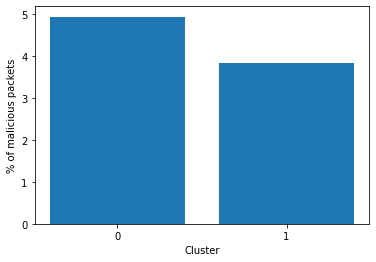

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the data from the CSV file
df = pd.read_csv('C:/Users/Admin/Desktop/Tema-Master/ddos_and_mitc_attack.csv')

# Remove the label column
X = df.drop('label', axis=1)

# Convert categorical features to numeric using label encoding
le = LabelEncoder()
X['src_ip'] = le.fit_transform(X['src_ip'])
X['dst_ip'] = le.fit_transform(X['dst_ip'])
X['flags'] = le.fit_transform(X['flags'])

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the KMeans model
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

# Make predictions and calculate percentage of malicious packets in each cluster
y_pred = model.predict(X)
df['cluster'] = y_pred
cluster_counts = df['cluster'].value_counts()
malignant_counts = df[df['label'] == 'malicious']['cluster'].value_counts()
percent_malicious = (malignant_counts / cluster_counts) * 100

# Plot the results
plt.bar(percent_malicious.index, percent_malicious.values)
plt.xticks([0, 1])
plt.xlabel('Cluster')
plt.ylabel('% of malicious packets')
plt.show()

# Calculate and display the confusion matrix
# y_true = df['label']
# cm = confusion_matrix(y_true, y_pred)
# print(cm)